In [1]:
#fuente: https://datos.cdmx.gob.mx/dataset/redmet
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de los gráficos para que se muestren en el notebook
%matplotlib inline
sns.set(style='whitegrid')

In [2]:
# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('redmet_2023_05.csv')

# Ordenar los datos por la columna 'time'
#df = df.sort_values(by='time')

In [3]:
# Renombrar columnas específicas
#Temperatura (TMP)
#Humedad Relativa (RH)
#Dirección del viento (WDR)
#Velocidad del viento (WSP)

df = df.rename(columns={'RH': 'humedad', 'TMP': 'temperatura', 'WSP':'velocidad_viento','WDR':'direccion_viento'})

In [4]:
# Mostrar las primeras filas del DataFrame para una vista inicial
print("Vista inicial de los datos:")
df.head()



Vista inicial de los datos:


,fecha,humedad,temperatura,direccion_viento,velocidad_viento
0,2015-01-01,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,70.271845,9.070227,266.889764,2.963517


In [5]:
# Resumen general del DataFrame (para ver tipos de datos, valores nulos, etc.)
print("\nResumen del DataFrame:")
df.info()


Resumen del DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3073 entries, 0 to 3072
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fecha             3073 non-null   object 
 1   humedad           3073 non-null   float64
 2   temperatura       3073 non-null   float64
 3   direccion_viento  3073 non-null   float64
 4   velocidad_viento  3073 non-null   float64
dtypes: float64(4), object(1)
memory usage: 120.2+ KB


In [6]:
# Descripción estadística de las columnas numéricas
print("\nDescripción estadística de las columnas numéricas:")
df.describe()


Descripción estadística de las columnas numéricas:


,humedad,temperatura,direccion_viento,velocidad_viento
count,3073.000000,3073.000000,3073.000000,3073.000000
mean,54.997567,16.684047,181.283290,2.096990
std,13.425615,2.251684,21.723282,0.437577
min,15.220273,6.700000,124.183712,1.225906
25%,45.535117,15.288328,166.823427,1.800225
50%,56.381818,16.799598,177.932971,2.024167
75%,65.270633,18.159963,191.369792,2.304915
max,88.766667,22.999200,289.713115,6.331789


In [7]:
# Verificar si hay valores nulos
print("\nCantidad de valores nulos por columna:")
print(df.isnull().sum())


Cantidad de valores nulos por columna:
fecha               0
humedad             0
temperatura         0
direccion_viento    0
velocidad_viento    0
dtype: int64


In [8]:
#Rellenar valores nulos con la media
# df['nombre_columna'] = df['nombre_columna'].fillna(df['nombre_columna'].mean())

In [9]:
# Verificar si hay duplicados
print("\nNúmero de filas duplicadas:")
print(df.duplicated().sum())


Número de filas duplicadas:
0


In [10]:
# Eliminar filas duplicadas
df.drop_duplicates(inplace=True)

In [11]:
# Cambiar columna 'fecha' a formato datetime
df['fecha'] = pd.to_datetime(df['fecha'])

In [12]:
# Normalizar los nombres de las columnas (eliminar espacios, poner en minúsculas, etc.)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [13]:
# Verificar la consistencia de valores en una columna 'hostname'
#print("\nValores únicos en la columna 'hostname':")
#print(df['hostname'].unique())

In [14]:
# Filtrar valores inconsistentes o atípicos en una columna numérica 
# Filtrar por rango de valores lógicos (ejemplo: 'cpu_usage' entre 0 y 100)
#df = df[(df['cpu_usage'] >= 0) & (df['cpu_usage'] <= 100)]

In [15]:
# Guardar el DataFrame limpio en un nuevo archivo CSV
#df.to_csv('myIOTDynamoDB_dev2_data_v3_clean.csv', index=False)
#print("\nDatos limpios guardados en 'myIOTDynamoDB_dev3_data_clean.csv'")


In [16]:
# Mostrar algunas filas del DataFrame limpio
print("\nVista de los datos después de la limpieza:")
df.head()


Vista de los datos después de la limpieza:


,fecha,humedad,temperatura,direccion_viento,velocidad_viento
0,2015-01-01,60.565476,13.385714,156.723039,1.933333
1,2015-01-02,52.452381,13.567262,176.710784,2.559804
2,2015-01-03,55.763636,13.893333,190.830846,2.136318
3,2015-01-04,62.776786,12.536012,196.306373,2.592647
4,2015-01-05,70.271845,9.070227,266.889764,2.963517


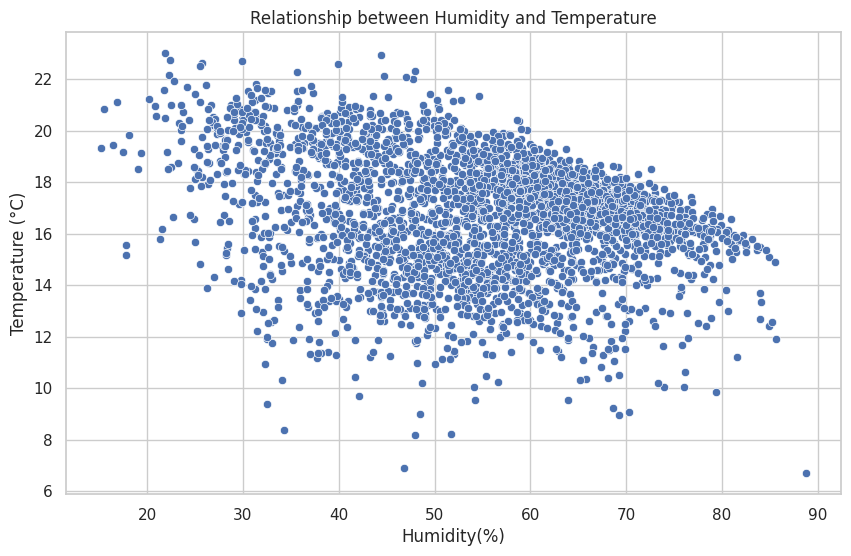

In [17]:
# Scatter plot to analyze the relationship between two variables (e.g., 'cpu_usage' and 'cpu_temp')
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='humedad', y='temperatura')
plt.title('Relationship between Humidity and Temperature')
plt.xlabel('Humidity(%)')
plt.ylabel('Temperature (°C)')
plt.show()


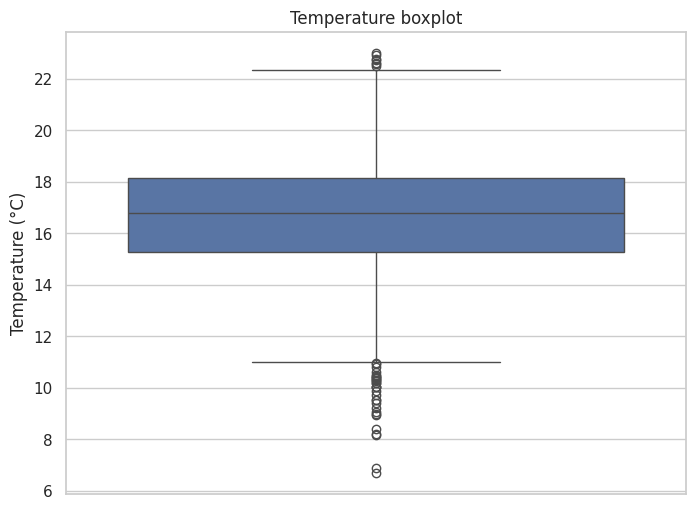

In [18]:
# Gráfico de caja (boxplot) para identificar outliers en una columna (por ejemplo, 'upload_speed')
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, y='temperatura')
plt.title('Temperature boxplot')
plt.ylabel('Temperature (°C)')
plt.show()

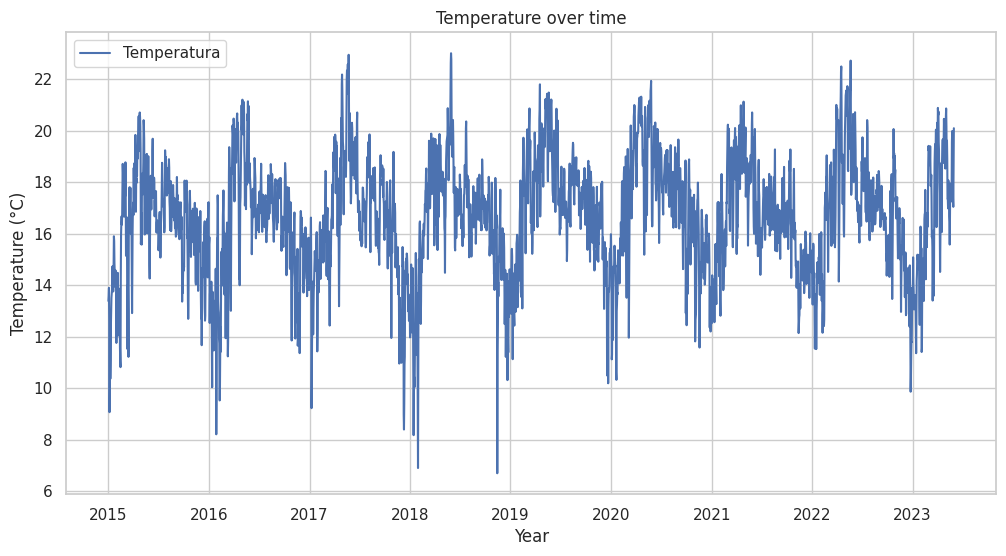

In [19]:
# Crear una figura y un gráfico de líneas para 'temperatura' y 'humedad' usando 'fecha' como eje x
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='fecha', y='temperatura', label='Temperatura')
#sns.lineplot(data=df, x='fecha', y='humedad', label='Humedad')
plt.title('Temperature over time')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()


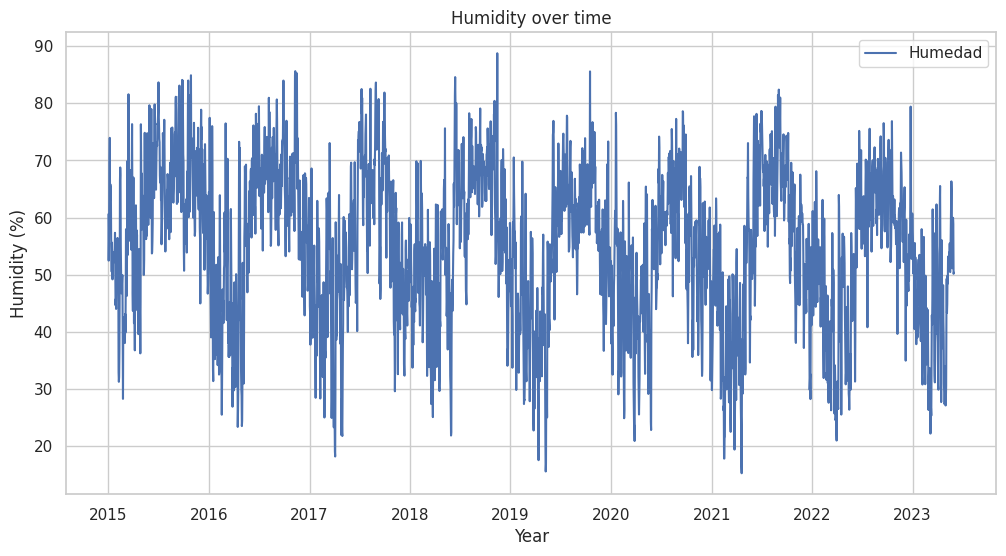

In [20]:
# Crear una figura y un gráfico de líneas para 'temperatura' y 'humedad' usando 'fecha' como eje x
plt.figure(figsize=(12, 6))
#sns.lineplot(data=df, x='fecha', y='temperatura', label='Temperatura')
sns.lineplot(data=df, x='fecha', y='humedad', label='Humedad')
plt.title('Humidity over time')
plt.xlabel('Year')
plt.ylabel('Humidity (%)')
plt.legend()
plt.show()

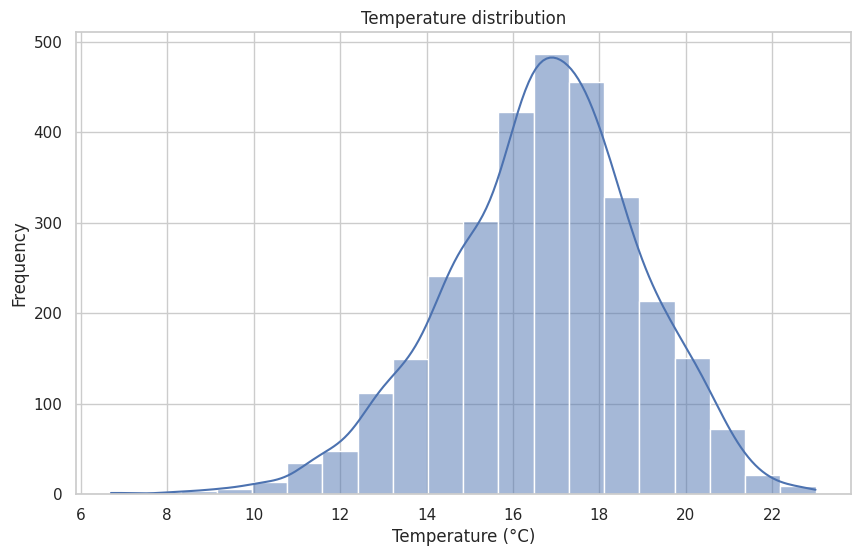

In [21]:
# Gráfico de distribución para una columna numérica (por ejemplo, 'cpu_usage')
plt.figure(figsize=(10, 6))
sns.histplot(df['temperatura'], bins=20, kde=True)
plt.title('Temperature distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()

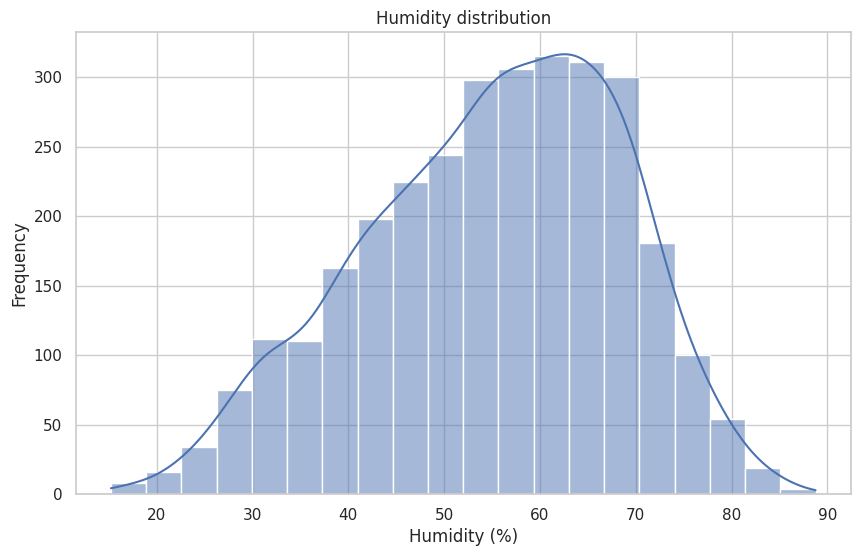

In [22]:
# Gráfico de distribución para una columna numérica (por ejemplo, 'cpu_usage')
plt.figure(figsize=(10, 6))
sns.histplot(df['humedad'], bins=20, kde=True)
plt.title('Humidity distribution')
plt.xlabel('Humidity (%)')
plt.ylabel('Frequency')
plt.show()

In [23]:
# Extraer año y estación
df['año'] = df['fecha'].dt.year
df['mes'] = df['fecha'].dt.month
df['estacion'] = df['fecha'].dt.month % 12 // 3 + 1  # Cálculo para obtener las estaciones
# Asignar nombres a las estaciones
df['estacion'] = df['estacion'].map({1: 'Invierno', 2: 'Primavera', 3: 'Verano', 4: 'Otoño'})

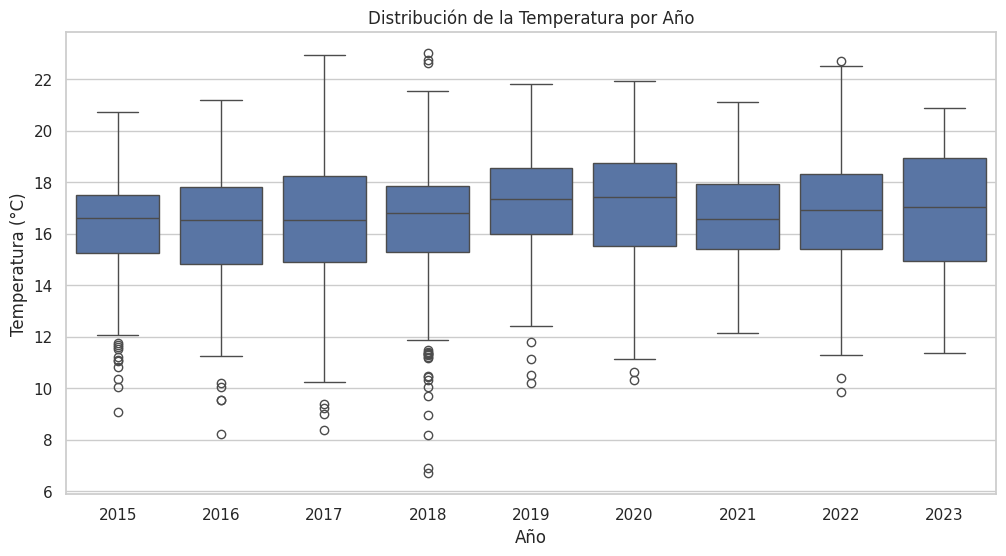

In [24]:
# Boxplot de temperatura por año
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='año', y='temperatura')
plt.title('Distribución de la Temperatura por Año')
plt.xlabel('Año')
plt.ylabel('Temperatura (°C)')
plt.show()

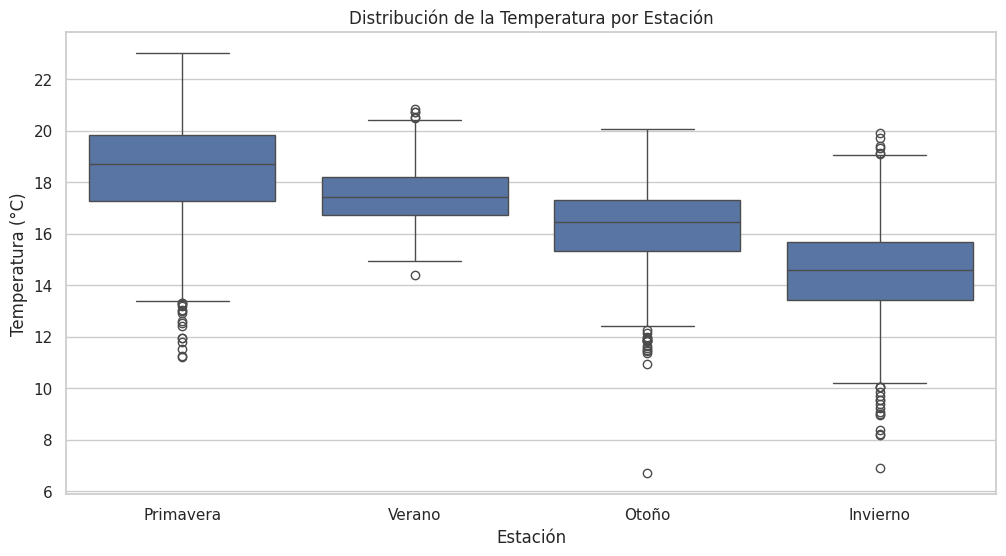

In [25]:
# Boxplot de temperatura por estación
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='estacion', y='temperatura', order=['Primavera', 'Verano', 'Otoño','Invierno'])
plt.title('Distribución de la Temperatura por Estación')
plt.xlabel('Estación')
plt.ylabel('Temperatura (°C)')
plt.show()


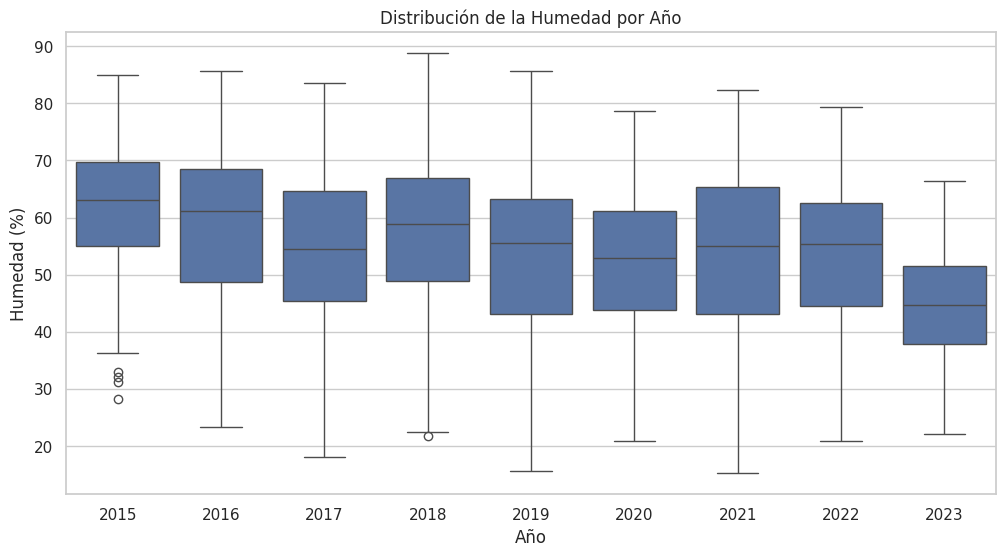

In [26]:
# Boxplot de humedad por año
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='año', y='humedad')
plt.title('Distribución de la Humedad por Año')
plt.xlabel('Año')
plt.ylabel('Humedad (%)')
plt.show()


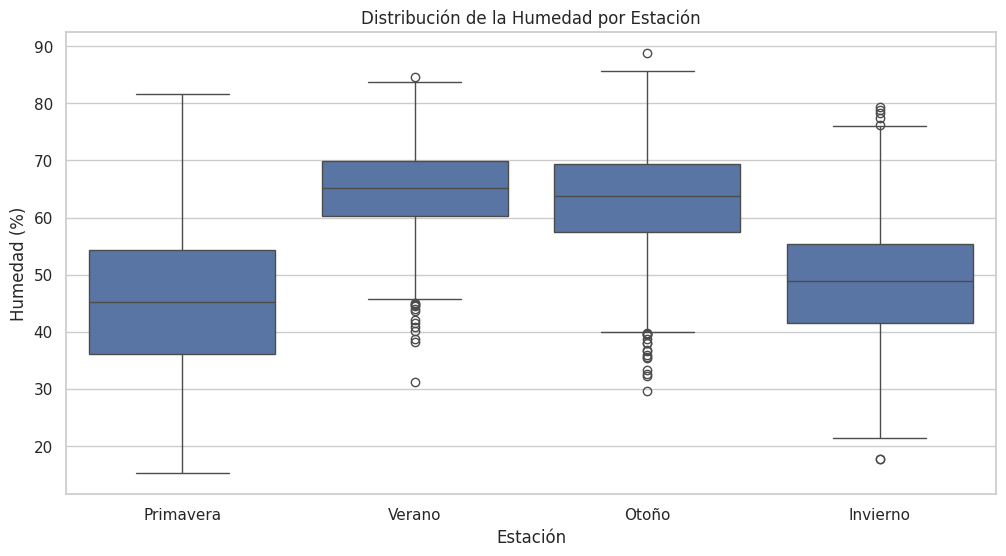

In [27]:
# Boxplot de humedad por estación
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='estacion', y='humedad', order=['Primavera', 'Verano', 'Otoño','Invierno'])
plt.title('Distribución de la Humedad por Estación')
plt.xlabel('Estación')
plt.ylabel('Humedad (%)')
plt.show()

In [28]:
# Crear una tabla dinámica para la temperatura
tabla_temperatura = df.pivot_table(values='temperatura', index='mes', columns='año', aggfunc='mean')


<Figure size 1200x800 with 0 Axes>

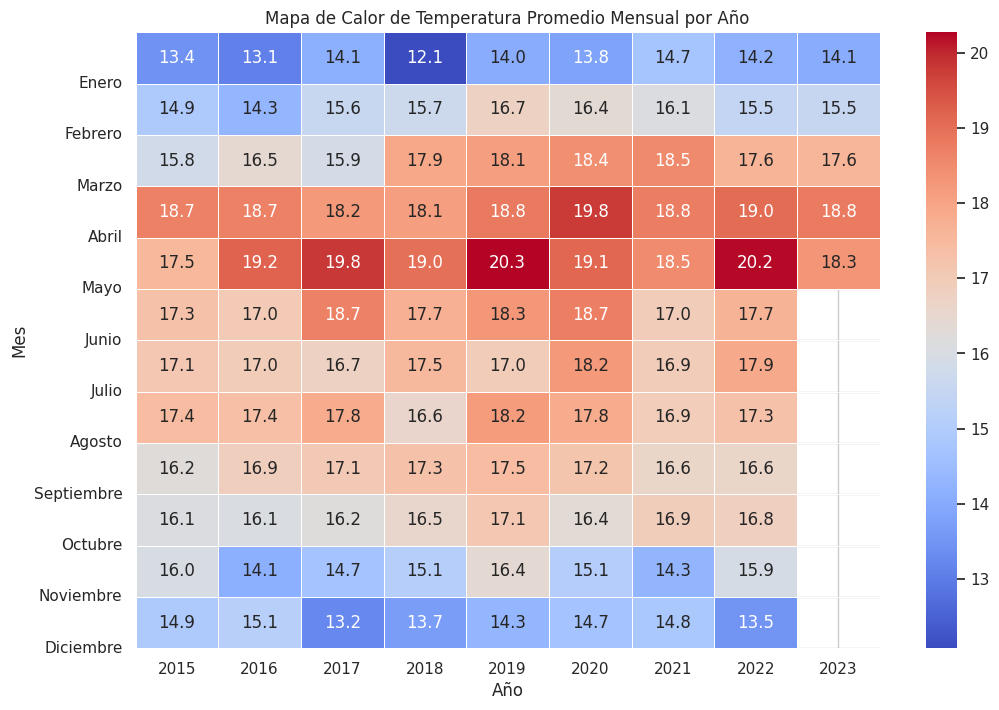

In [29]:
# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el mapa de calor# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(tabla_temperatura, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)

# Configurar los títulos y etiquetas
plt.title('Mapa de Calor de Temperatura Promedio Mensual por Año')
plt.xlabel('Año')
plt.ylabel('Mes')

# Ajustar los nombres de los meses si lo deseas
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.yticks(ticks=range(1,13), labels=meses, rotation=0)

plt.show()

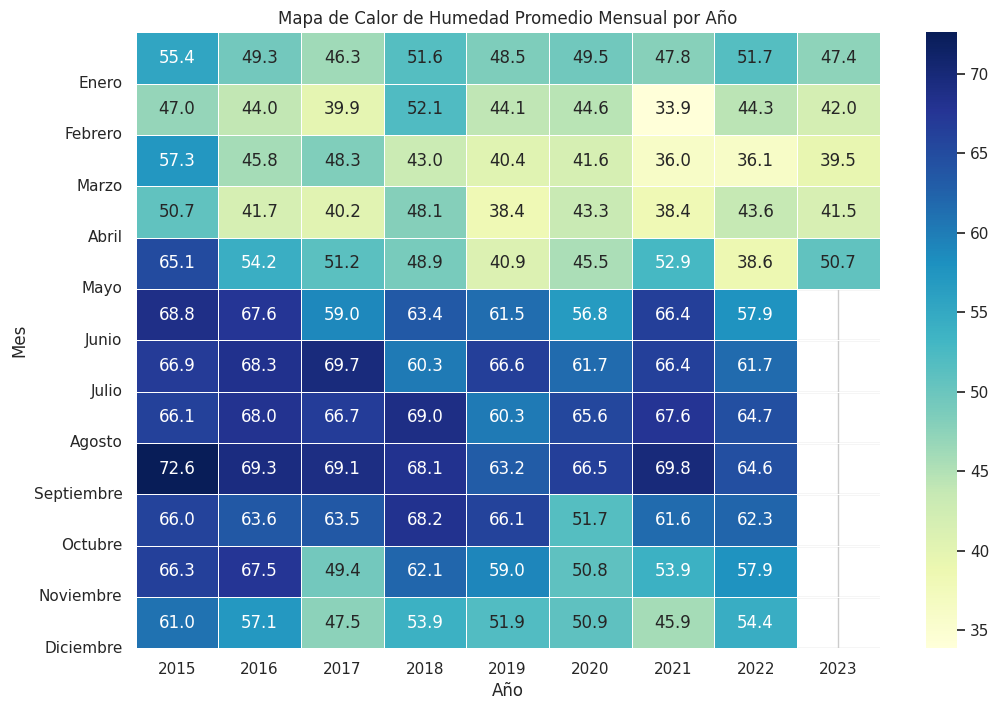

In [30]:
# Crear una tabla dinámica para la humedad
tabla_humedad = df.pivot_table(values='humedad', index='mes', columns='año', aggfunc='mean')

# Configurar el tamaño de la figura
plt.figure(figsize=(12, 8))

# Crear el mapa de calor
sns.heatmap(tabla_humedad, annot=True, fmt=".1f", cmap="YlGnBu", linewidths=.5)

# Configurar los títulos y etiquetas
plt.title('Mapa de Calor de Humedad Promedio Mensual por Año')
plt.xlabel('Año')
plt.ylabel('Mes')

# Ajustar los nombres de los meses
meses = ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 
         'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre']
plt.yticks(ticks=range(1,13), labels=meses, rotation=0)

plt.show()



### Predicción

Modelos de series temporales para predecir la temperatura y humedad en el futuro utilizando los modelos ARIMA y Prophet

In [38]:
from prophet import Prophet

In [39]:
# Asegurar que los datos están ordenados por fecha
df = df.sort_values(by='fecha')
df.set_index('fecha', inplace=True)

df_temperatura = df[['temperatura']]
df_humedad = df[['humedad']]


KeyError: "None of ['fecha'] are in the columns"

14:14:39 - cmdstanpy - INFO - Chain [1] start processing
14:14:39 - cmdstanpy - INFO - Chain [1] done processing


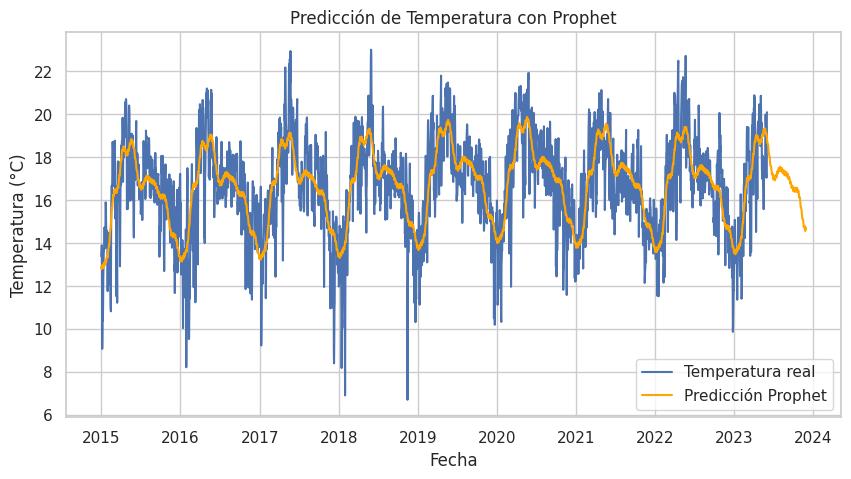

In [41]:

# Preparar los datos para Prophet
df_temperatura_prophet = df_temperatura.reset_index()
df_temperatura_prophet.columns = ['ds', 'y']

df_humedad_prophet = df_humedad.reset_index()
df_humedad_prophet.columns = ['ds', 'y']

# Función para entrenar y predecir usando Prophet
def prophet_forecast(data, periods=180):
    model = Prophet()
    model.fit(data)
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    return forecast

# Predicción de temperatura con Prophet
forecast_temperatura = prophet_forecast(df_temperatura_prophet)
plt.figure(figsize=(10, 5))
plt.plot(df_temperatura.index, df_temperatura['temperatura'], label='Temperatura real')
plt.plot(forecast_temperatura['ds'], forecast_temperatura['yhat'], label='Predicción Prophet', color='orange')
plt.title('Predicción de Temperatura con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Temperatura (°C)')
plt.legend()
plt.show()




14:14:57 - cmdstanpy - INFO - Chain [1] start processing
14:14:57 - cmdstanpy - INFO - Chain [1] done processing


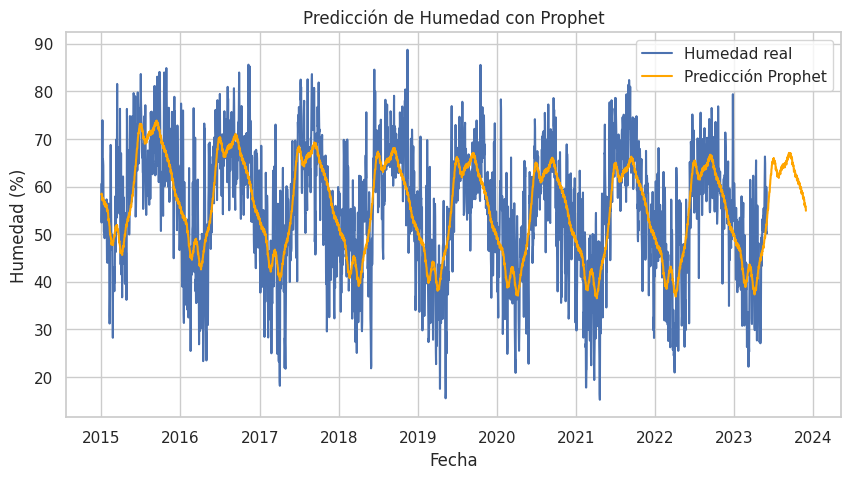

In [42]:
# Predicción de humedad con Prophet
forecast_humedad = prophet_forecast(df_humedad_prophet)
plt.figure(figsize=(10, 5))
plt.plot(df_humedad.index, df_humedad['humedad'], label='Humedad real')
plt.plot(forecast_humedad['ds'], forecast_humedad['yhat'], label='Predicción Prophet', color='orange')
plt.title('Predicción de Humedad con Prophet')
plt.xlabel('Fecha')
plt.ylabel('Humedad (%)')
plt.legend()
plt.show()